In [1]:
import requests as rq
import lxml.html as lx
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import math





## Obtain Kings Players Stats + Salary

In [2]:
#read html + make df for general stats
url = 'https://www.espn.com/nba/team/stats/_/name/sac/salary'
names = pd.read_html(url)[0]
stats = pd.read_html(url)[1]
kings_stats_temp = pd.concat([names,stats],axis = "columns")
kings_stats_temp

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,De'Aaron Fox PG,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2
1,Domantas Sabonis PF,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6
2,Kevin Huerter SG,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2
3,Malik Monk SG,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3
4,Harrison Barnes SF,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5
5,Keegan Murray SF,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6
6,Terence Davis SG,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0
7,Davion Mitchell PG,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2
8,Trey Lyles PF,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8
9,Chimezie Metu PF,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2


In [3]:
def remove_positions(df):
    '''Removes The position indicator after each player's name (i.e. PG, PF, SG), also drops the "Total" row as it's not needed.'''
    words = []
    for i in df["Name"]:
        words.append(i.split()[0:2])
    words = pd.DataFrame(words)
    words.columns = ["First","Last"]
    words["Names"] = words['First']+" "+ words["Last"]
    words = words.drop("First", axis = 1).drop("Last", axis = 1)
    df["Name"] = words
    df = df.drop(16)
    return df

kings_stats = remove_positions(kings_stats_temp)
kings_stats

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2


In [4]:
# read html + make df for shooting stats
shoot = pd.read_html(url)[3]
kings_shoot_stats_temp = pd.concat([names,shoot], axis = "columns")

In [5]:
kings_shoot_stats = remove_positions(kings_shoot_stats_temp)
kings_shoot_stats

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,De'Aaron Fox,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57
1,Domantas Sabonis,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62
2,Kevin Huerter,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60
3,Malik Monk,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58
4,Harrison Barnes,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55
5,Keegan Murray,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51
6,Terence Davis,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56
7,Davion Mitchell,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52
8,Trey Lyles,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53
9,Chimezie Metu,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65


In [6]:
#create salary df
url2 = "https://www.espn.com/nba/team/roster/_/name/sac/salary"
kings_salary_raw = pd.read_html(url2)[0]

In [7]:
#Strips player number from each players name
for i in range(0,len(kings_salary_raw)):
    kings_salary_raw["Name"][i] = re.sub(r"\d+", "", str(kings_salary_raw["Name"][i]))

/tmp/ipykernel_387/1132565592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kings_salary_raw["Name"][i] = re.sub(r"\d+", "", str(kings_salary_raw["Name"][i]))


In [8]:
#Cleans dataframe to only player name + salary
kings_salary = kings_salary_raw.set_index("Name").drop('Unnamed: 0', axis = 1)
kings_salary.columns
kings_salary = kings_salary.drop(['POS', 'Age', 'HT', 'WT', 'College'], axis = 1)
kings_salary

,Salary
Name,
Keon Ellis,--
Neemias Queta,--
Chima Moneke,"$1,017,781"
KZ Okpala,"$1,782,621"
Matthew Dellavedova,"$1,836,090"
Chimezie Metu,"$1,910,680"
Trey Lyles,"$2,700,000"
Alex Len,"$3,918,000"
Terence Davis,"$4,000,000"


In [9]:
#combine player stats df and salary df as kings_stats_salary. 
pd.set_option('display.max_columns', None)
kings_stats_salary = kings_stats.join(kings_salary, on = "Name")
kings_stats_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,"$1,910,680"


In [10]:
#combine kings shooting stats df with "kings_stats_salary".
kings_player_shooting_salary = pd.merge(kings_stats_salary,kings_shoot_stats, how = "left", on = "Name")
kings_player_shooting_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,"$28,103,550",8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,"$18,500,000",6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,"$14,508,929",5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,"$9,472,219",5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,"$18,352,273",4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,"$8,008,440",4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,"$4,000,000",2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,"$4,833,600",2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,"$2,700,000",2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,"$1,910,680",2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65


In [11]:
#Rearrange salary to column to go at the end.
salary = kings_player_shooting_salary.pop("Salary")
kings_final_df = pd.concat([kings_player_shooting_salary, salary], axis = 'columns')
kings_final_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65,"$1,910,680"


#combine shooting stats df and salary df. 
kings_stats_salary = kings_shoot_stats.join(kings_salary, on = "Name")
kings_stats_salary

#Merging salary into player and shooting stats dataframe, then moving the "salary" column to the end.
pd.set_option('display.max_columns', None)
kings_player_shooting_salary = pd.merge(kings_stats_salary,kings_stats, how = "left", on = "Name")
salary = kings_player_shooting_salary.pop("Salary")
kings_final_df = pd.concat([kings_player_shooting_salary, salary], axis = 'columns')



kings_final_df

## Obtain NBA Team Stats

In [12]:
nbateamstats = pd.DataFrame()
for i in range(2023,2018, -1):
    tempurl = "https://www.espn.com/nba/stats/team/_/view/opponent/season/"+str(i)+"/seasontype/2"
    team_names = pd.read_html(tempurl)[0]
    team_stats = pd.read_html(tempurl)[1]
    team_stats
    team_concat = pd.concat([team_names,team_stats],axis = "columns")
    team_concat['Team'] = str(i) + " " + team_concat['Team'].astype(str)
    nbateamstats = pd.concat([nbateamstats, team_concat], ignore_index = True)
nbateamstats

,RK,Team,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
0,1,2023 Cleveland Cavaliers,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1
1,2,2023 Philadelphia 76ers,23,106.6,39.4,83.9,47.0,10.4,32.0,32.7,17.3,22.5,76.6,9.7,33.0,42.6,24.0,6.8,5.2,14.7,19.0
2,3,2023 Milwaukee Bucks,22,108.0,40.3,89.8,44.8,11.1,31.5,35.3,16.4,21.0,77.8,10.1,33.1,43.2,21.4,6.5,4.9,12.6,20.1
3,4,2023 Dallas Mavericks,22,108.3,39.6,82.5,48.0,10.9,30.0,36.4,18.2,23.2,78.6,9.5,33.5,43.0,23.2,6.5,4.5,15.1,23.0
4,5,2023 Phoenix Suns,23,108.4,38.9,84.3,46.1,10.6,29.7,35.8,20.0,25.0,80.2,10.4,31.2,41.6,22.7,6.3,4.1,15.1,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26,2019 Sacramento Kings,82,115.3,42.3,90.6,46.6,12.0,34.6,34.8,18.8,24.4,77.0,11.2,36.8,48.0,24.7,7.5,5.1,15.3,21.4
146,27,2019 New Orleans Pelicans,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0
147,28,2019 Phoenix Suns,82,116.8,42.5,88.2,48.2,11.1,29.9,37.2,20.8,27.6,75.3,11.8,35.3,47.2,25.9,9.0,5.0,15.2,20.7
148,29,2019 Washington Wizards,82,116.9,43.4,90.5,48.0,12.1,32.8,37.0,18.0,23.1,77.8,11.4,35.8,47.3,26.2,7.7,4.6,15.0,21.2


In [13]:
nbateams = pd.read_html("https://www.espn.com/nba/stats/team/_/view/opponent/season/2023/seasontype/2")[0]["Team"]
nbateams

0        Cleveland Cavaliers
1         Philadelphia 76ers
2            Milwaukee Bucks
3           Dallas Mavericks
4               Phoenix Suns
5                LA Clippers
6            Toronto Raptors
7              Brooklyn Nets
8                 Miami Heat
9       New Orleans Pelicans
10    Portland Trail Blazers
11        Washington Wizards
12            Boston Celtics
13             Chicago Bulls
14             Atlanta Hawks
15            Denver Nuggets
16         Memphis Grizzlies
17             Orlando Magic
18         Charlotte Hornets
19           New York Knicks
20        Los Angeles Lakers
21          Sacramento Kings
22                 Utah Jazz
23    Minnesota Timberwolves
24     Golden State Warriors
25            Indiana Pacers
26           Houston Rockets
27     Oklahoma City Thunder
28           Detroit Pistons
29         San Antonio Spurs
Name: Team, dtype: object

In [14]:
def clean_teams(team, stats):
    #Function fixes errors caused by read_html function. Makes the "row header" back into the first row
    team1 = team.columns[0] 
    team.columns = ["Team"]
    new_row = pd.DataFrame({team.columns[0]:team1}, index=[0])
    team = pd.concat([new_row,team.loc[:]]).reset_index(drop=True)
    #Standardizes NBA team names across dataframes to allow easy joining between them
    for i in range(0, len(team.iloc[:,0])):
        for teamname in nbateams:
            if team.iloc[:,0][i].__contains__(teamname):
                team.iloc[:,0][i] = teamname
                break
            else:
                continue
    result = team.join(stats.iloc[:,0:2])
    return(result)
    
def add_playoff_status(df, year):
    #df input: conference standings (15 teams) ranked in order by wins
    #creates new variable that shows if a certain team made the playoffs 
    #2023 is the current season and the playoffs have not happened yet, therefore NaN
    if year == 2023:
        df["Made Playoffs"] = math.nan
        return(df)
    df["Made Playoffs"] = int(0)
    #2019-20 top 8 teams per conference made playoffs
    if year in [2019, 2020]:
        for index in df.index:
            if index < 8:
                df.iloc[index,3] = int(1)
    #2021-22 top 10 teams per conference made playoffs
    else:
        for index in df.index:
            if index < 10:
                df.iloc[index,3] = int(1)
    return(df)


league_wins_losses = pd.DataFrame()
for i in range(2023,2018, -1):
    urlstandings = "https://www.espn.com/nba/standings/_/season/"+ str(i)
    teams_east = pd.read_html(urlstandings)[0]
    stats_east = pd.read_html(urlstandings)[1]
    teams_west = pd.read_html(urlstandings)[2]
    stats_west = pd.read_html(urlstandings)[3]
    teams_east = clean_teams(teams_east, stats_east)
    teams_east = add_playoff_status(teams_east, i)
    teams_west = clean_teams(teams_west, stats_west)
    teams_west = add_playoff_status(teams_west, i)
    df_win_loss = pd.concat([teams_east, teams_west], ignore_index = True)
    df_win_loss['Team'] = str(i) + " " + df_win_loss['Team'].astype(str)
    league_wins_losses = pd.concat([league_wins_losses, df_win_loss], ignore_index = True)
league_wins_losses

,Team,W,L,Made Playoffs
0,2023 Boston Celtics,20,5,NaN
1,2023 Milwaukee Bucks,17,6,NaN
2,2023 Cleveland Cavaliers,15,9,NaN
3,2023 Atlanta Hawks,13,11,NaN
4,2023 Indiana Pacers,12,11,NaN
...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0
146,2019 Memphis Grizzlies,33,49,0.0
147,2019 New Orleans Pelicans,33,49,0.0
148,2019 Dallas Mavericks,33,49,0.0


In [15]:
fullnbastats = pd.merge(league_wins_losses, nbateamstats, on="Team")
fullnbastats = fullnbastats.drop(['RK'], axis=1)
fullnbastats

,Team,W,L,Made Playoffs,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
0,2023 Boston Celtics,20,5,NaN,24,112.7,42.2,90.0,46.9,11.4,32.1,35.4,16.9,21.5,78.5,10.0,33.2,43.3,22.1,6.3,3.7,12.5,20.5
1,2023 Milwaukee Bucks,17,6,NaN,22,108.0,40.3,89.8,44.8,11.1,31.5,35.3,16.4,21.0,77.8,10.1,33.1,43.2,21.4,6.5,4.9,12.6,20.1
2,2023 Cleveland Cavaliers,15,9,NaN,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1
3,2023 Atlanta Hawks,13,11,NaN,23,113.3,41.3,88.1,46.8,10.6,32.0,33.0,20.2,25.5,79.4,10.9,34.3,45.2,24.0,7.0,5.1,14.6,21.1
4,2023 Indiana Pacers,12,11,NaN,23,116.4,41.2,87.6,47.0,12.8,34.5,37.2,21.3,26.1,81.4,11.0,34.3,45.3,25.8,7.7,5.5,15.7,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9
146,2019 Memphis Grizzlies,33,49,0.0,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4
147,2019 New Orleans Pelicans,33,49,0.0,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0
148,2019 Dallas Mavericks,33,49,0.0,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2


In [16]:
nbaefficiencystats = pd.DataFrame()
for year in range(2023,2018, -1):
    efficiencyurl = "http://www.espn.com/nba/hollinger/teamstats/_/sort/defensiveEff/year/"+ str(year)
    efficiencystats = pd.read_html(efficiencyurl)[0].iloc[1: , 1:]
    efficiencystats = pd.DataFrame(efficiencystats.values[1:], columns=efficiencystats.iloc[0])
    for i in range(0, len(efficiencystats.iloc[:,0])):
        for teamname in nbateams:
            if efficiencystats.iloc[:,0][i] == "LA Lakers":
                efficiencystats.iloc[:,0][i] = "Los Angeles Lakers"
                break
            if efficiencystats.iloc[:,0][i] in teamname:
                efficiencystats.iloc[:,0][i] = teamname
                break
            else:
                continue
    efficiencystats = efficiencystats.rename(columns = {"TEAM": "Team"})
    efficiencystats['Team'] = str(year) + " " + efficiencystats['Team'].astype(str)
    efficiencystats = efficiencystats[["Team", "PACE", "EFF FG%", "OFF EFF", "DEF EFF"]]
    nbaefficiencystats = pd.concat([nbaefficiencystats, efficiencystats], ignore_index = True)
nbaefficiencystats

1,Team,PACE,EFF FG%,OFF EFF,DEF EFF
0,2023 Cleveland Cavaliers,96.1,54.6,111.0,105.4
1,2023 Milwaukee Bucks,101.7,53.3,109.0,106.0
2,2023 New Orleans Pelicans,100.1,54.9,113.6,106.1
3,2023 Philadelphia 76ers,99.2,54.3,109.6,106.9
4,2023 LA Clippers,100.8,53.5,106.0,107.5
...,...,...,...,...,...
145,2019 Chicago Bulls,101.1,50.5,102.5,110.9
146,2019 Atlanta Hawks,106.4,52.2,105.5,111.2
147,2019 Washington Wizards,103.7,53.1,108.6,111.3
148,2019 Phoenix Suns,102.9,51.4,103.6,112.2


In [17]:
fullnbastats = pd.merge(fullnbastats, nbaefficiencystats, on="Team")
fullnbastats

,Team,W,L,Made Playoffs,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,EFF FG%,OFF EFF,DEF EFF
0,2023 Boston Celtics,20,5,NaN,24,112.7,42.2,90.0,46.9,11.4,32.1,35.4,16.9,21.5,78.5,10.0,33.2,43.3,22.1,6.3,3.7,12.5,20.5,98.9,59.1,118.5,110.5
1,2023 Milwaukee Bucks,17,6,NaN,22,108.0,40.3,89.8,44.8,11.1,31.5,35.3,16.4,21.0,77.8,10.1,33.1,43.2,21.4,6.5,4.9,12.6,20.1,101.7,53.3,109.0,106.0
2,2023 Cleveland Cavaliers,15,9,NaN,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1,96.1,54.6,111.0,105.4
3,2023 Atlanta Hawks,13,11,NaN,23,113.3,41.3,88.1,46.8,10.6,32.0,33.0,20.2,25.5,79.4,10.9,34.3,45.2,24.0,7.0,5.1,14.6,21.1,103.0,52.1,109.7,109.1
4,2023 Indiana Pacers,12,11,NaN,23,116.4,41.2,87.6,47.0,12.8,34.5,37.2,21.3,26.1,81.4,11.0,34.3,45.3,25.8,7.7,5.5,15.7,20.9,103.2,52.7,108.3,111.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,51.1,108.4,110.2
146,2019 Memphis Grizzlies,33,49,0.0,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,50.8,103.8,106.2
147,2019 New Orleans Pelicans,33,49,0.0,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,52.9,108.6,110.4
148,2019 Dallas Mavericks,33,49,0.0,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,51.9,106.6,108.3


In [18]:
fullnbastats["PACE"] = fullnbastats["PACE"].astype(float)
fullnbastats["EFF FG%"] = fullnbastats["EFF FG%"].astype(float)
fullnbastats["OFF EFF"] = fullnbastats["OFF EFF"].astype(float)
fullnbastats["DEF EFF"] = fullnbastats["DEF EFF"].astype(float)
kingsfullstats_5years = fullnbastats[fullnbastats['Team'].str.contains('Kings')]
kingsindex = fullnbastats[fullnbastats['Team'] == '2023 Sacramento Kings'].index

## Plotting NBA Comparisons

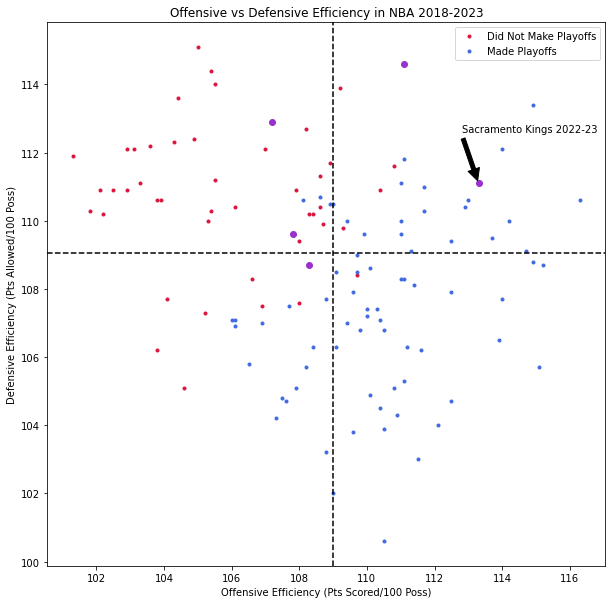

In [19]:
def comparison_plot(df, index1, index2, xloc, yloc):
    groups = df.groupby("Made Playoffs")
    plt.figure(figsize=(10, 10))
    for name, group in groups:
        if name == 0:
            name = "Did Not Make Playoffs"
            playoffcolor = 'crimson'
        else:
            name = "Made Playoffs"
            playoffcolor = 'royalblue'
        plt.plot(group.iloc[:,index1], group.iloc[:,index2], marker=".", linestyle="", label=name, color = playoffcolor)
    plt.legend()
    plt.plot(kingsfullstats_5years.iloc[:,index1], kingsfullstats_5years.iloc[:,index2], linestyle='none', marker = 'o', color ='darkorchid')
    plt.annotate('Sacramento Kings 2022-23', 
             xy=(df.iloc[kingsindex,index1], df.iloc[kingsindex,index2]), 
             xytext=(df.iloc[kingsindex,index1] + xloc, df.iloc[kingsindex,index2] + yloc),
             arrowprops=dict(facecolor='black', shrink=0.05))
    plt.axvline(mean(fullnbastats.iloc[:,index1]), color='k', linestyle='dashed')
    plt.axhline(mean(fullnbastats.iloc[:,index2]), color='k', linestyle='dashed')
    
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("OFF EFF"), fullnbastats.columns.get_loc("DEF EFF"), -0.5, 1.5)
plt.xlabel("Offensive Efficiency (Pts Scored/100 Poss)")
plt.ylabel("Defensive Efficiency (Pts Allowed/100 Poss)")
plt.title("Offensive vs Defensive Efficiency in NBA 2018-2023")
plt.show()

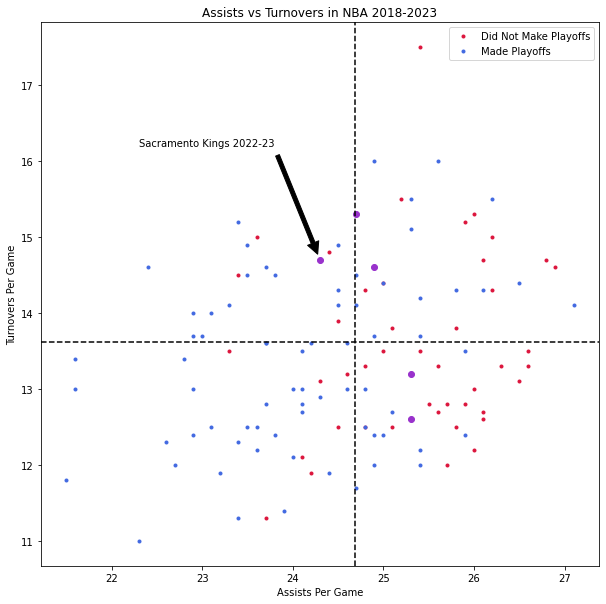

In [20]:
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("AST"), fullnbastats.columns.get_loc("TO"), -2, 1.5)
plt.xlabel("Assists Per Game")
plt.ylabel("Turnovers Per Game")
plt.title("Assists vs Turnovers in NBA 2018-2023")
plt.show()

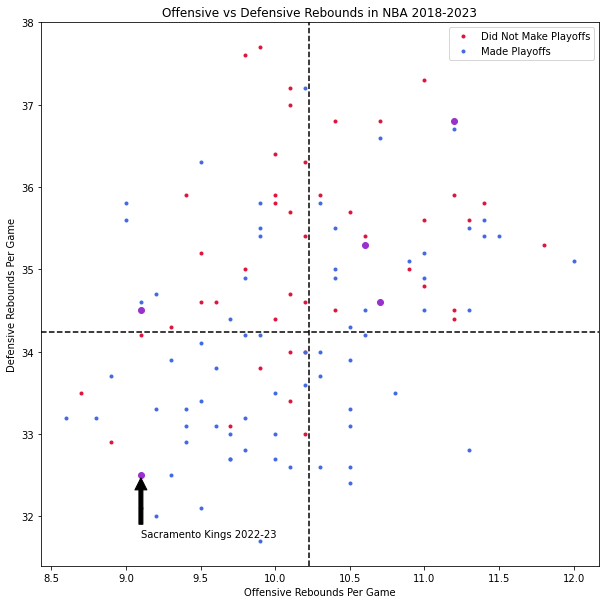

In [21]:
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("OR"), fullnbastats.columns.get_loc("DR"), 0, -0.75)
plt.xlabel("Offensive Rebounds Per Game")
plt.ylabel("Defensive Rebounds Per Game")
plt.title("Offensive vs Defensive Rebounds in NBA 2018-2023")
plt.show()

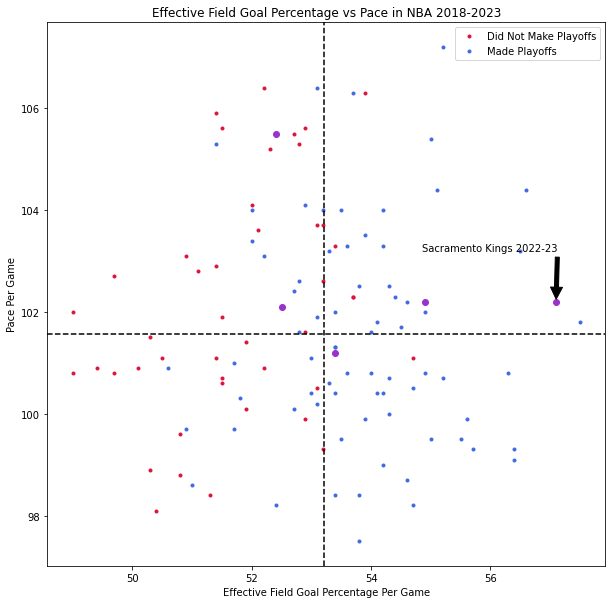

In [22]:
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("EFF FG%"), fullnbastats.columns.get_loc("PACE"), -2.25, 1)
plt.xlabel("Effective Field Goal Percentage Per Game")
plt.ylabel("Pace Per Game")
plt.title("Effective Field Goal Percentage vs Pace in NBA 2018-2023")
plt.show()

## Classification

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
fullnbastats['Win %'] = fullnbastats['W'] / fullnbastats['GP']
fullnbastats

,Team,W,L,Made Playoffs,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,EFF FG%,OFF EFF,DEF EFF,Win %
0,2023 Boston Celtics,20,5,NaN,24,112.7,42.2,90.0,46.9,11.4,32.1,35.4,16.9,21.5,78.5,10.0,33.2,43.3,22.1,6.3,3.7,12.5,20.5,98.9,59.1,118.5,110.5,0.833333
1,2023 Milwaukee Bucks,17,6,NaN,22,108.0,40.3,89.8,44.8,11.1,31.5,35.3,16.4,21.0,77.8,10.1,33.1,43.2,21.4,6.5,4.9,12.6,20.1,101.7,53.3,109.0,106.0,0.772727
2,2023 Cleveland Cavaliers,15,9,NaN,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1,96.1,54.6,111.0,105.4,0.625000
3,2023 Atlanta Hawks,13,11,NaN,23,113.3,41.3,88.1,46.8,10.6,32.0,33.0,20.2,25.5,79.4,10.9,34.3,45.2,24.0,7.0,5.1,14.6,21.1,103.0,52.1,109.7,109.1,0.565217
4,2023 Indiana Pacers,12,11,NaN,23,116.4,41.2,87.6,47.0,12.8,34.5,37.2,21.3,26.1,81.4,11.0,34.3,45.3,25.8,7.7,5.5,15.7,20.9,103.2,52.7,108.3,111.3,0.521739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,51.1,108.4,110.2,0.439024
146,2019 Memphis Grizzlies,33,49,0.0,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,50.8,103.8,106.2,0.402439
147,2019 New Orleans Pelicans,33,49,0.0,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,52.9,108.6,110.4,0.402439
148,2019 Dallas Mavericks,33,49,0.0,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,51.9,106.6,108.3,0.402439


In [24]:
x = fullnbastats[30:].drop(columns = ['Made Playoffs', 'Team', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'EFF FG%', 'W', 'L', "GP"])
x

,PTS,FG%,3P%,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,OFF EFF,DEF EFF,Win %
30,105.6,44.7,33.9,77.9,9.5,32.1,41.7,23.3,7.4,4.0,14.1,20.6,98.2,111.2,106.3,0.646341
31,104.5,43.4,33.9,78.3,10.5,33.3,43.7,21.6,7.5,4.6,13.0,19.4,99.0,112.1,104.0,0.621951
32,112.1,45.6,35.6,75.1,9.9,34.2,44.1,25.9,7.4,4.4,12.4,19.7,102.2,112.5,109.4,0.621951
33,107.3,45.8,34.6,76.9,10.2,34.0,44.2,23.6,6.6,4.6,12.5,19.4,98.4,111.0,108.3,0.621951
34,107.1,46.2,35.4,78.9,10.3,33.7,44.0,25.3,6.7,5.1,15.1,19.1,98.6,109.6,107.9,0.585366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,114.0,46.7,37.8,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,108.4,110.2,0.439024
146,106.1,45.1,36.0,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,103.8,106.2,0.402439
147,116.8,46.6,36.4,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,108.6,110.4,0.402439
148,110.1,45.9,34.4,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,106.6,108.3,0.402439


In [25]:
y= fullnbastats["Made Playoffs"][30:]
y

30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
      ... 
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
Name: Made Playoffs, Length: 120, dtype: float64

x = fullnbastats[30:][['GP', 'PTS', 'FG%', '3P%','FT%', 'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PACE',
       'EFF FG%', 'OFF EFF', 'DEF EFF']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
#lower VIF factor values means less multicollinearity

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
model = LogisticRegression(solver='liblinear', C = 1, random_state=0, max_iter = 1000)
model.fit(x_train, y_train)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x_test)
model.predict(x_test)
model.score(x_test, y_test)
#confusion_matrix(y_test, model.predict(x_test))

0.9

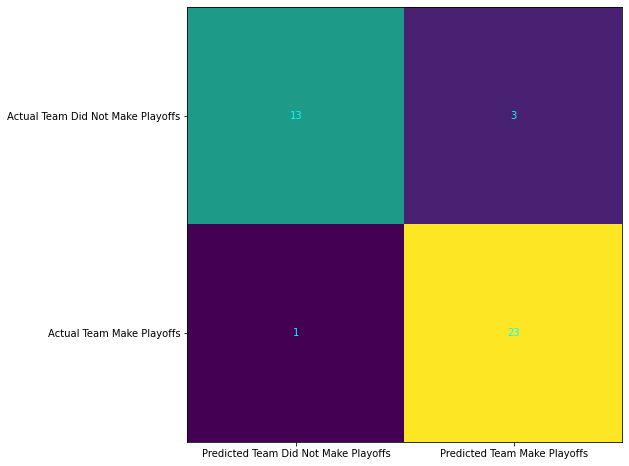

In [28]:
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Team Did Not Make Playoffs', 'Predicted Team Make Playoffs'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Team Did Not Make Playoffs', 'Actual Team Make Playoffs'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color = 'cyan')
plt.show()

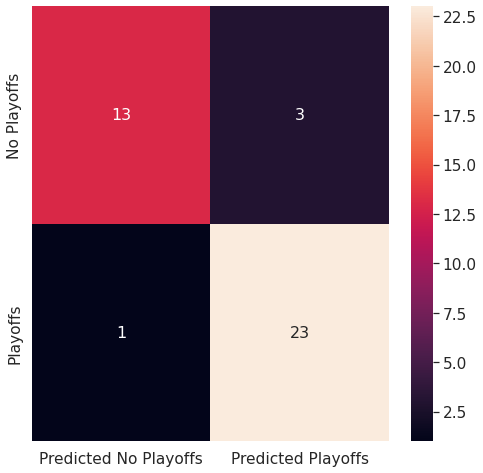

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[13,1,1,0,2,0],
         [3,9,6,0,1,0],
         [0,0,16,2,0,0],
         [0,0,0,13,0,0],
         [0,0,0,0,15,0],
         [0,0,1,0,0,15]]
df_cm = pd.DataFrame(cm, ['No Playoffs', 'Playoffs'], ['Predicted No Playoffs', 'Predicted Playoffs'])
plt.figure(figsize=(8,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [30]:
print(classification_report(y_test, model.predict(x_test)))
kingsfullnbastats23 = fullnbastats[fullnbastats['Team'] == '2023 Sacramento Kings'].drop(columns = ['Made Playoffs', 'Team', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'EFF FG%', 'L', 'W','GP'])
#kingsfullnbastats23 = fullnbastats[0:30].drop(columns = ['Made Playoffs', 'Team', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'EFF FG%', 'W', 'L', 'GP'])
kingsfullnbastats23

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        16
         1.0       0.88      0.96      0.92        24

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



,PTS,FG%,3P%,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,OFF EFF,DEF EFF,Win %
19,115.5,48.3,37.3,80.9,9.1,32.5,41.6,24.3,7.5,4.5,14.7,21.4,102.2,113.3,111.1,0.590909


## Results

In [31]:
model.predict_proba(kingsfullnbastats23)
model.predict(kingsfullnbastats23)

array([1.])

In [32]:
model.predict_proba(kingsfullnbastats23)

array([[0.24975653, 0.75024347]])

In [33]:
#Dataframes available:
kings_stats
kings_shoot_stats
kings_salary
nbateams
kings_final_df
league_wins_losses
nbateamstats
nbaefficiencystats
fullnbastats

,Team,W,L,Made Playoffs,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,EFF FG%,OFF EFF,DEF EFF,Win %
0,2023 Boston Celtics,20,5,NaN,24,112.7,42.2,90.0,46.9,11.4,32.1,35.4,16.9,21.5,78.5,10.0,33.2,43.3,22.1,6.3,3.7,12.5,20.5,98.9,59.1,118.5,110.5,0.833333
1,2023 Milwaukee Bucks,17,6,NaN,22,108.0,40.3,89.8,44.8,11.1,31.5,35.3,16.4,21.0,77.8,10.1,33.1,43.2,21.4,6.5,4.9,12.6,20.1,101.7,53.3,109.0,106.0,0.772727
2,2023 Cleveland Cavaliers,15,9,NaN,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1,96.1,54.6,111.0,105.4,0.625000
3,2023 Atlanta Hawks,13,11,NaN,23,113.3,41.3,88.1,46.8,10.6,32.0,33.0,20.2,25.5,79.4,10.9,34.3,45.2,24.0,7.0,5.1,14.6,21.1,103.0,52.1,109.7,109.1,0.565217
4,2023 Indiana Pacers,12,11,NaN,23,116.4,41.2,87.6,47.0,12.8,34.5,37.2,21.3,26.1,81.4,11.0,34.3,45.3,25.8,7.7,5.5,15.7,20.9,103.2,52.7,108.3,111.3,0.521739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,51.1,108.4,110.2,0.439024
146,2019 Memphis Grizzlies,33,49,0.0,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,50.8,103.8,106.2,0.402439
147,2019 New Orleans Pelicans,33,49,0.0,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,52.9,108.6,110.4,0.402439
148,2019 Dallas Mavericks,33,49,0.0,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,51.9,106.6,108.3,0.402439


In [34]:
%store kings_final_df


Stored 'kings_final_df' (DataFrame)
